## 완료되시면 LC 제출
## 그동안 배웠던 문법 복습하는 시간으로 생각하시면 되고, 과제 외에 질문 있으시면 질문하셔도 좋습니다.

실제 데이터분석가로서 현업에 투입되면, 데이터를 분석하는 일보다 데이터를 정리하는 일에 더 많은 시간을 할애하게 됩니다. 통상적으로 전체 업무시간에 70% ~ 80%는 데이터를 정리하는 일을 하게 되는데, 이 과정에서 실력있는 데이터 분석가와 그렇지 않은 데이터 분석가의 차이가 눈에 보이게 됩니다. 실력있는 데이터 분석가는 동일한 분량의 데이터를 2~3시간 안에 처리하는데 비해, 실력이 부족하고 아직 툴에 익숙하지 않은 데이터 분석가는 적어도 반나절, 길면 하루 ~ 이틀 정도의 시간을 투입해야 겨우 동일한 분량의 데이터를 처리하곤 합니다.

문제를 풀 때 다른 자료를 참고하거나, 구글에 검색하는 것 모두 허용합니다.

In [1]:
# 관련 모듈 import 하기
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 
#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작도되록 하는 설정

In [3]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [4]:
# 콘솔에서 모든 출력 허용하기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [5]:
# 판다스 데이터프레임(DataFrame)을 출력할 때, 최대 출력할 수 있는 컬럼을 100개로 
# 데이터를 분석할 때 출력해서 확인하기 편함
pd.options.display.max_columns = 100

### 데이터 로딩하기

먼저 데이터를 로딩해오겠습니다. 데이터를 읽어올때는 [판다스(Pandas)](https://pandas.pydata.org/)의 [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) 라는 기능을 사용합니다.

여기서 파일의 경로를 지정하는 방법에 주의하셔야 합니다. read_csv를 실행할 때 (**FileNotFoundError**)라는 이름의 에러가 난다면 경로가 제대로 지정이 되지 않은 것입니다. 

**차주정보.csv**

문법 연습을 할때 사용할 데이터는 신용카드 데이터 입니다. 금융데이터 허브(https://www.bigdata-finance.kr/dataset/datasetView.do?datastId=SET1400010)에서 수집한 데이터 입니다.
가장 처음 가져올 데이터는  ```차주정보.csv``` 입니다. 여기에는 신용정보원 일반신용정보DB에 등록된 개인(이하 차주)에 대한 인구통계 관련 정보를 제공합니다. 컬럼 정보는 다음과 같습니다.

- 차주 일련번호 : 차주정보와 대출,연체,카드 개설정보를 결합하기 위한 key
- 생년 : 차주 출생년도(샘플링 시점 80세 이상은 '80세의 생년'으로 묶음<br>
                       샘플링 시점 19세 이하는 '19세의 생년'으로 묶음)
- 성별 : 1.남성, 2: 여성



In [6]:
raw_data = pd.read_csv("C:/Users/Administrator/Desktop/coding/python/muticam/jupyter note/data/차주정보.csv")

In [7]:
# 0. raw_data의 개요를 확인하시오.

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   strd_yymm  50 non-null     int64 
 1   deto_id    50 non-null     object
 2   bth_yr     50 non-null     int64 
 3   sex_cd     50 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [8]:
#1. raw_data 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.


In [8]:
raw_data.shape

(50, 4)

In [10]:
# 2. raw_data의 처음과 마지막 5행씩을 출력하시오



In [9]:
raw_data.head()
raw_data.tail()

,strd_yymm,deto_id,bth_yr,sex_cd
0,202010,X0010254691714933659,1990,1
1,202010,X0013455316779233219,1954,2
2,202010,X0019385710745765957,1977,1
3,202010,X0019442830801994941,1992,1
4,202010,X0032015350750301834,1968,1


,strd_yymm,deto_id,bth_yr,sex_cd
45,202010,X0456268139651732219,1950,2
46,202010,X0471166329698944221,1956,1
47,202010,X0472554518406992051,1982,2
48,202010,X0473756250702972881,1958,2
49,202010,X0474444465014724107,1967,1


In [12]:
# 3. raw_data의 컬럼명과 index 명을 확인하시오.



In [10]:
raw_data.index   #행제목(행번호)
raw_data.columns  #열제목

RangeIndex(start=0, stop=50, step=1)

Index(['strd_yymm', 'deto_id', 'bth_yr', 'sex_cd'], dtype='object')

In [14]:
# 2. 1번에서 확인한 컬럼명을 아래와 같이 수정하시오
# strd_yymm : 수집년월
# deto_id : 사용자ID
# bth_yr : 생년

In [11]:

# 강사샘 코드
raw_data.rename(columns={"strd_yymm" : "수집년월",
                         "deto_id" : "사용자ID",
                         "bth_yr" : "생년 "                  
                },inplace=True)
raw_data

,수집년월,사용자ID,생년,sex_cd
0,202010,X0010254691714933659,1990,1
1,202010,X0013455316779233219,1954,2
2,202010,X0019385710745765957,1977,1
3,202010,X0019442830801994941,1992,1
4,202010,X0032015350750301834,1968,1
5,202010,X0040437714409076855,1961,2
6,202010,X0060546064543865767,1994,1
7,202010,X0080319379158089172,1985,1
8,202010,X0088676443599868338,1999,2
9,202010,X0113312418671928134,1998,1


In [12]:
raw_data.rename(columns={raw_data.columns[0]:"수집년월"},inplace=True)
raw_data.rename(columns={raw_data.columns[1]:"사용자ID"},inplace=True)
raw_data.rename(columns={raw_data.columns[2]:"생년"},inplace=True)
raw_data

,수집년월,사용자ID,생년,sex_cd
0,202010,X0010254691714933659,1990,1
1,202010,X0013455316779233219,1954,2
2,202010,X0019385710745765957,1977,1
3,202010,X0019442830801994941,1992,1
4,202010,X0032015350750301834,1968,1
5,202010,X0040437714409076855,1961,2
6,202010,X0060546064543865767,1994,1
7,202010,X0080319379158089172,1985,1
8,202010,X0088676443599868338,1999,2
9,202010,X0113312418671928134,1998,1


In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   수집년월    50 non-null     int64 
 1   사용자ID   50 non-null     object
 2   생년      50 non-null     int64 
 3   sex_cd  50 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [18]:
# 3. 1번에서 확인한 인덱스를 1부터 50 까지의 정수로 수정하시오
# -강사샘은 내포포문애용해서 인덱스 수정함

In [19]:
# raw_data.index=raw_data.index+1       #인덱스 +1 코드   #내포포문이 조금더 활용이 편함

In [14]:
[i for i in range(1,51)]
# raw_data.index=[i for i in range(1,51)]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [23]:
raw_data.index=[i for i in range(1,51)]  # 내포포문을 이용한 인덱스+1

In [24]:
raw_data

,수집년월,사용자ID,생년,sex_cd,나이,연령대,성별
1,202010,X0010254691714933659,1990,1,31,중년,남
2,202010,X0013455316779233219,1954,2,67,노년,여
3,202010,X0019385710745765957,1977,1,44,중년,남
4,202010,X0019442830801994941,1992,1,29,청년,남
5,202010,X0032015350750301834,1968,1,53,장년,남
6,202010,X0040437714409076855,1961,2,60,장년,여
7,202010,X0060546064543865767,1994,1,27,청년,남
8,202010,X0080319379158089172,1985,1,36,중년,남
9,202010,X0088676443599868338,1999,2,22,청년,여
10,202010,X0113312418671928134,1998,1,23,청년,남


In [16]:
raw_data.columns[[2]]
raw_data.info()

Index(['생년'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   수집년월    50 non-null     int64 
 1   사용자ID   50 non-null     object
 2   생년      50 non-null     int64 
 3   sex_cd  50 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [25]:
# 3. 출생년도를 4개의 카테고리로 분류하여 연령대 필드를 생성하시오. (청년(19~29세); 중년(30~49세); 장년(50~64세); 노년(65세 이상))
# 2020년 나이를 기준으로 경계(bins)는 직접 설정 하시오
# -강사샘꺼랑 비교해볼것

In [25]:
#먼저 나이를 구한다
raw_data['나이'] = 2020-raw_data["생년"]+1
raw_data
print(type(raw_data))

,수집년월,사용자ID,생년,sex_cd,나이,연령대,성별
1,202010,X0010254691714933659,1990,1,31,중년,남
2,202010,X0013455316779233219,1954,2,67,노년,여
3,202010,X0019385710745765957,1977,1,44,중년,남
4,202010,X0019442830801994941,1992,1,29,청년,남
5,202010,X0032015350750301834,1968,1,53,장년,남
6,202010,X0040437714409076855,1961,2,60,장년,여
7,202010,X0060546064543865767,1994,1,27,청년,남
8,202010,X0080319379158089172,1985,1,36,중년,남
9,202010,X0088676443599868338,1999,2,22,청년,여
10,202010,X0113312418671928134,1998,1,23,청년,남


<class 'pandas.core.frame.DataFrame'>


In [26]:
# 범위를 설정한다:(청년(19~29세); 중년(30~49세); 장년(50~64세); 노년(65세 이상))
# bins=[1,15,25,35,60,99]
# labels=['청년','중년','장년','노년']

bins=[19,29,49,64,100]
labels=['청년','중년','장년','노년']

raw_data["연령대"]=pd.cut(raw_data["나이"], bins=bins,labels=labels)
raw_data

,수집년월,사용자ID,생년,sex_cd,나이,연령대,성별
1,202010,X0010254691714933659,1990,1,31,중년,남
2,202010,X0013455316779233219,1954,2,67,노년,여
3,202010,X0019385710745765957,1977,1,44,중년,남
4,202010,X0019442830801994941,1992,1,29,청년,남
5,202010,X0032015350750301834,1968,1,53,장년,남
6,202010,X0040437714409076855,1961,2,60,장년,여
7,202010,X0060546064543865767,1994,1,27,청년,남
8,202010,X0080319379158089172,1985,1,36,중년,남
9,202010,X0088676443599868338,1999,2,22,청년,여
10,202010,X0113312418671928134,1998,1,23,청년,남


In [54]:
# bins = [1938,1956,1972,1992,2002]
# labels=['노년','장년','중년','청년']
# raw_data['연령대']=pd.cut(raw_data['생년'],bins,labels=labels)
# raw_data

,수집년월,사용자ID,생년,연령대,성별
1,202010,X0010254691714933659,1990,중년,남
2,202010,X0013455316779233219,1954,노년,여
3,202010,X0019385710745765957,1977,중년,남
4,202010,X0019442830801994941,1992,중년,남
5,202010,X0032015350750301834,1968,장년,남
6,202010,X0040437714409076855,1961,장년,여
7,202010,X0060546064543865767,1994,청년,남
8,202010,X0080319379158089172,1985,중년,남
9,202010,X0088676443599868338,1999,청년,여
10,202010,X0113312418671928134,1998,청년,남


In [27]:
# 4. raw_data의 성별필드를 추가하되 sex_cd 필드의 값이 1이면 M, 2면 F 로 값을 정하시오

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   수집년월    50 non-null     int64   
 1   사용자ID   50 non-null     object  
 2   생년      50 non-null     int64   
 3   sex_cd  50 non-null     int64   
 4   나이      50 non-null     int64   
 5   연령대     50 non-null     category
 6   성별      50 non-null     object  
dtypes: category(1), int64(4), object(2)
memory usage: 3.0+ KB


In [28]:
raw_data['성별']= ['남' if i==1 else '여' for i in raw_data['sex_cd']]
raw_data

# lis=[]
# for i in raw_data['sex_cd'] :
#     if i==1 :
#         lis.append('남')
#     else :
#         lis.append('여')
        
# raw_data['성별'] = lis
# 위 코드와 동일함

,수집년월,사용자ID,생년,sex_cd,나이,연령대,성별
1,202010,X0010254691714933659,1990,1,31,중년,남
2,202010,X0013455316779233219,1954,2,67,노년,여
3,202010,X0019385710745765957,1977,1,44,중년,남
4,202010,X0019442830801994941,1992,1,29,청년,남
5,202010,X0032015350750301834,1968,1,53,장년,남
6,202010,X0040437714409076855,1961,2,60,장년,여
7,202010,X0060546064543865767,1994,1,27,청년,남
8,202010,X0080319379158089172,1985,1,36,중년,남
9,202010,X0088676443599868338,1999,2,22,청년,여
10,202010,X0113312418671928134,1998,1,23,청년,남


In [30]:
# -강사샘은 내포포문 활용함

In [29]:
def male_or_female(x):
    if x==1:
        return "남자" 
    else :
        return "여자"
    raw_data["성별"]=raw_data["sex_cd"].apply(male_or_female)
    
raw_data   


,수집년월,사용자ID,생년,sex_cd,나이,연령대,성별
1,202010,X0010254691714933659,1990,1,31,중년,남
2,202010,X0013455316779233219,1954,2,67,노년,여
3,202010,X0019385710745765957,1977,1,44,중년,남
4,202010,X0019442830801994941,1992,1,29,청년,남
5,202010,X0032015350750301834,1968,1,53,장년,남
6,202010,X0040437714409076855,1961,2,60,장년,여
7,202010,X0060546064543865767,1994,1,27,청년,남
8,202010,X0080319379158089172,1985,1,36,중년,남
9,202010,X0088676443599868338,1999,2,22,청년,여
10,202010,X0113312418671928134,1998,1,23,청년,남


In [30]:
# 걍 범위로 함  # 원래는 apply로 ~!!
# def male_or_female(x):if x==1:return "남자" else  x==2:return "여자"
# raw_data["성별"]=raw_data["sex_cd"].apply(male_or_female)
bins=[0,1,2]
labels=["남","여"]

raw_data["성별"]=pd.cut(raw_data["sex_cd"], bins=bins,labels=labels)
raw_data

,수집년월,사용자ID,생년,sex_cd,나이,연령대,성별
1,202010,X0010254691714933659,1990,1,31,중년,남
2,202010,X0013455316779233219,1954,2,67,노년,여
3,202010,X0019385710745765957,1977,1,44,중년,남
4,202010,X0019442830801994941,1992,1,29,청년,남
5,202010,X0032015350750301834,1968,1,53,장년,남
6,202010,X0040437714409076855,1961,2,60,장년,여
7,202010,X0060546064543865767,1994,1,27,청년,남
8,202010,X0080319379158089172,1985,1,36,중년,남
9,202010,X0088676443599868338,1999,2,22,청년,여
10,202010,X0113312418671928134,1998,1,23,청년,남


In [33]:
# 5. sex_cd 열을 삭제하시오.


In [38]:
del raw_data["sex_cd"] #코드 재활용
raw_data


,수집년월,사용자ID,생년,나이,연령대,성별
1,202010,X0010254691714933659,1990,31,중년,남
2,202010,X0013455316779233219,1954,67,노년,여
3,202010,X0019385710745765957,1977,44,중년,남
4,202010,X0019442830801994941,1992,29,청년,남
5,202010,X0032015350750301834,1968,53,장년,남
6,202010,X0040437714409076855,1961,60,장년,여
7,202010,X0060546064543865767,1994,27,청년,남
8,202010,X0080319379158089172,1985,36,중년,남
9,202010,X0088676443599868338,1999,22,청년,여
10,202010,X0113312418671928134,1998,23,청년,남


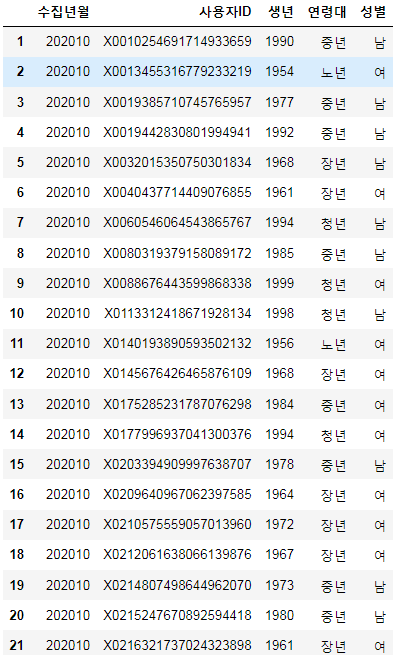

In [39]:
low1=raw_data
low1

,수집년월,사용자ID,생년,나이,연령대,성별
1,202010,X0010254691714933659,1990,31,중년,남
2,202010,X0013455316779233219,1954,67,노년,여
3,202010,X0019385710745765957,1977,44,중년,남
4,202010,X0019442830801994941,1992,29,청년,남
5,202010,X0032015350750301834,1968,53,장년,남
6,202010,X0040437714409076855,1961,60,장년,여
7,202010,X0060546064543865767,1994,27,청년,남
8,202010,X0080319379158089172,1985,36,중년,남
9,202010,X0088676443599868338,1999,22,청년,여
10,202010,X0113312418671928134,1998,23,청년,남


**카드개설정보.csv**

문법 연습을 할때 사용할 데이터는 신용카드 데이터 입니다. 금융데이터 허브(https://www.bigdata-finance.kr/dataset/datasetView.do?datastId=SET1400010)에서 수집한 데이터 입니다.
이번에 가져올 데이터는  ```카드개설정보.csv``` 입니다. 여기에는 카드개설 관련정보를 카드 개설 기간동안 월말 스냅샷 형태로 제공합니다. 컬럼 정보는 다음과 같습니다.

- 기준년월 : 해당 데이터 수집 시점
- 차주 일련번호 : 차주정보와 대출,연체,카드 개설정보를 결합하기 위한 key
- 기관일련번호 : 카드개설정보와 대출.연체정보를 금융회사 단위로 결합하기 위한 key
- 개설사유코드 : 0081:신용카드, 0083: 신용체크카드
- 카드유형코드 : 1.개인카드, 2개인기업카드
- 개설년월 : 카드 개설정보가 등록된 년월(YYYYMM)



In [32]:
raw_data_open=pd.read_csv("C:/Users/Administrator/Desktop/coding/python/muticam/jupyter note/data/카드개설정보.csv")

In [37]:
#6. raw_data_open 데이터프레임의 필드수와 컬럼수를 확인하시오.


In [33]:
raw_data_open.shape

(97320, 7)

In [39]:
#7. raw_data_open 데이터프레임의 앞부분 레코드 5개 뒷부분 레코드 5개를 확인하시오.



In [34]:
raw_data_open.head()
raw_data_open.tail()

,strd_yymm,card_open_strd_yymm,deto_id,inst_id,card_open_rson_nm,card_typ_nm,card_open_yymm
0,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312
1,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006
2,202010,201612,X0010254691714933659,X2990775869667591539,81,1,201107
3,202010,201612,X0010254691714933659,Y5029072213910072970,81,1,201511
4,202010,201701,X0010254691714933659,X0739620684726734804,81,1,201312


,strd_yymm,card_open_strd_yymm,deto_id,inst_id,card_open_rson_nm,card_typ_nm,card_open_yymm
97315,202010,201811,Y9222402642167019485,Y7420900344501987908,81,1,200701
97316,202010,201812,Y9222402642167019485,X1297134994299296873,81,1,201306
97317,202010,201812,Y9222402642167019485,X6306325470693895595,81,1,201012
97318,202010,201812,Y9222402642167019485,Y5753670888276004077,81,1,201101
97319,202010,201812,Y9222402642167019485,Y7420900344501987908,81,1,200701


In [41]:
# 8.raw_data_open df의 index를 숫자 1~전체행수 로 설정하시오.


In [35]:
raw_data_open.index=[i for i in range(1,len(raw_data_open)+1)]
raw_data_open.tail()
#강사샘은 8번 이런식으로 내포포문 활용해서 함

,strd_yymm,card_open_strd_yymm,deto_id,inst_id,card_open_rson_nm,card_typ_nm,card_open_yymm
97316,202010,201811,Y9222402642167019485,Y7420900344501987908,81,1,200701
97317,202010,201812,Y9222402642167019485,X1297134994299296873,81,1,201306
97318,202010,201812,Y9222402642167019485,X6306325470693895595,81,1,201012
97319,202010,201812,Y9222402642167019485,Y5753670888276004077,81,1,201101
97320,202010,201812,Y9222402642167019485,Y7420900344501987908,81,1,200701


In [43]:
# raw_data_open.index=raw_data_open.index+1        # 인덱스 번호 +1 코드
# raw_data_open.tail() 

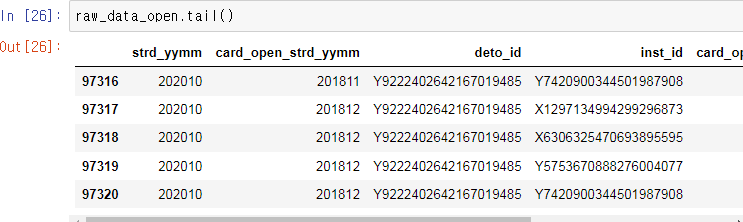

In [44]:
# 9. raw_data_open df의 컬럼명을 아래와 같이 변경하시오.
# strd_yymm : 수집년월
# card_open_strd_yymm : 1차수집년월
# deto_id : 사용자ID
# inst_id : 금융기관ID  
# card_open_yymm : 개설년월



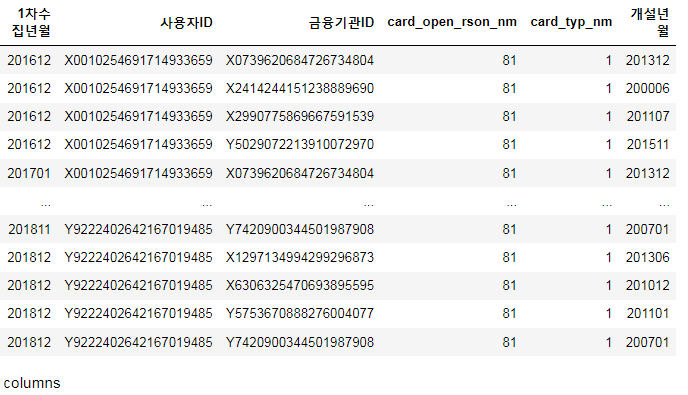

In [40]:
raw_data_open.rename(columns={
                              'strd_yymm':'수집년월',
                              'card_open_strd_yymm': '1차수집년월',
                              'deto_id' : '사용자ID',
                              'inst_id' : '금융기관ID',
                              'card_open_yymm' : '개설년월'
}, inplace=True)
raw_data_open
raw_data_open.info()

,수집년월,1차수집년월,사용자ID,금융기관ID,card_open_rson_nm,card_typ_nm,개설년월
1,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312
2,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006
3,202010,201612,X0010254691714933659,X2990775869667591539,81,1,201107
4,202010,201612,X0010254691714933659,Y5029072213910072970,81,1,201511
5,202010,201701,X0010254691714933659,X0739620684726734804,81,1,201312
...,...,...,...,...,...,...,...
97316,202010,201811,Y9222402642167019485,Y7420900344501987908,81,1,200701
97317,202010,201812,Y9222402642167019485,X1297134994299296873,81,1,201306
97318,202010,201812,Y9222402642167019485,X6306325470693895595,81,1,201012
97319,202010,201812,Y9222402642167019485,Y5753670888276004077,81,1,201101


<class 'pandas.core.frame.DataFrame'>
Int64Index: 97320 entries, 1 to 97320
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   수집년월               97320 non-null  int64 
 1   1차수집년월             97320 non-null  int64 
 2   사용자ID              97320 non-null  object
 3   금융기관ID             97320 non-null  object
 4   card_open_rson_nm  97320 non-null  int64 
 5   card_typ_nm        97320 non-null  int64 
 6   개설년월               97320 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 5.9+ MB


In [46]:
# raw_data_open.rename(columns={raw_data_open.columns[0]:"수집년월"},inplace=True)
# raw_data_open.rename(columns={raw_data_open.columns[1]:"1차수집년월"},inplace=True)
# raw_data_open.rename(columns={raw_data_open.columns[2]:"사용자ID"},inplace=True)
# raw_data_open.rename(columns={raw_data_open.columns[3]:"금융기관ID"},inplace=True)
# raw_data_open.rename(columns={raw_data_open.columns[-1]:"개설년월"},inplace=True)
# raw_data_open         위코드와 동일

In [46]:
# int형을 str형으로 바꾼후 datetime 함수사용....다른방법을 몰라서..
raw_data_open["개설년월"]=raw_data_open["개설년월"].astype("str")
raw_data_open["개설년월"]
#raw_data_open["개설년월"]=raw_data_open["개설년월"].apply(lambda _ : datetime.strptime(_,'%Y%m'))

1        201312
2        200006
3        201107
4        201511
5        201312
          ...  
97316    200701
97317    201306
97318    201012
97319    201101
97320    200701
Name: 개설년월, Length: 97320, dtype: object

In [47]:
raw_data_open
raw_data_open.info()
raw_data_open["개설년월"]

,수집년월,1차수집년월,사용자ID,금융기관ID,card_open_rson_nm,card_typ_nm,개설년월
1,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312
2,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006
3,202010,201612,X0010254691714933659,X2990775869667591539,81,1,201107
4,202010,201612,X0010254691714933659,Y5029072213910072970,81,1,201511
5,202010,201701,X0010254691714933659,X0739620684726734804,81,1,201312
...,...,...,...,...,...,...,...
97316,202010,201811,Y9222402642167019485,Y7420900344501987908,81,1,200701
97317,202010,201812,Y9222402642167019485,X1297134994299296873,81,1,201306
97318,202010,201812,Y9222402642167019485,X6306325470693895595,81,1,201012
97319,202010,201812,Y9222402642167019485,Y5753670888276004077,81,1,201101


<class 'pandas.core.frame.DataFrame'>
Int64Index: 97320 entries, 1 to 97320
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   수집년월               97320 non-null  int64 
 1   1차수집년월             97320 non-null  int64 
 2   사용자ID              97320 non-null  object
 3   금융기관ID             97320 non-null  object
 4   card_open_rson_nm  97320 non-null  int64 
 5   card_typ_nm        97320 non-null  int64 
 6   개설년월               97320 non-null  object
dtypes: int64(4), object(3)
memory usage: 5.9+ MB


1        201312
2        200006
3        201107
4        201511
5        201312
          ...  
97316    200701
97317    201306
97318    201012
97319    201101
97320    200701
Name: 개설년월, Length: 97320, dtype: object

In [43]:
# 10. 카드개설년월필드에 대해서 카드개설연도 카드개설월로 필드를 분리하시오


In [50]:
raw_data_open

,수집년월,1차수집년월,사용자ID,금융기관ID,card_open_rson_nm,card_typ_nm,개설년월
1,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312
2,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006
3,202010,201612,X0010254691714933659,X2990775869667591539,81,1,201107
4,202010,201612,X0010254691714933659,Y5029072213910072970,81,1,201511
5,202010,201701,X0010254691714933659,X0739620684726734804,81,1,201312
...,...,...,...,...,...,...,...
97316,202010,201811,Y9222402642167019485,Y7420900344501987908,81,1,200701
97317,202010,201812,Y9222402642167019485,X1297134994299296873,81,1,201306
97318,202010,201812,Y9222402642167019485,X6306325470693895595,81,1,201012
97319,202010,201812,Y9222402642167019485,Y5753670888276004077,81,1,201101


In [44]:
raw_data_open.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97320 entries, 1 to 97320
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   수집년월               97320 non-null  int64 
 1   1차수집년월             97320 non-null  int64 
 2   사용자ID              97320 non-null  object
 3   금융기관ID             97320 non-null  object
 4   card_open_rson_nm  97320 non-null  int64 
 5   card_typ_nm        97320 non-null  int64 
 6   개설년월               97320 non-null  object
dtypes: int64(4), object(3)
memory usage: 5.9+ MB


In [48]:
raw_data_open["카드개설연도"]=raw_data_open["개설년월"].str[0:4]
raw_data_open["카드개설월"]  =raw_data_open["개설년월"].str[4:6]


In [49]:
raw_data_open.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97320 entries, 1 to 97320
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   수집년월               97320 non-null  int64 
 1   1차수집년월             97320 non-null  int64 
 2   사용자ID              97320 non-null  object
 3   금융기관ID             97320 non-null  object
 4   card_open_rson_nm  97320 non-null  int64 
 5   card_typ_nm        97320 non-null  int64 
 6   개설년월               97320 non-null  object
 7   카드개설연도             97320 non-null  object
 8   카드개설월              97320 non-null  object
dtypes: int64(4), object(5)
memory usage: 7.4+ MB


In [50]:
raw_data_open["카드개설월"]=raw_data_open["카드개설월"].astype("int")
raw_data_open["카드개설연도"]=raw_data_open["카드개설연도"].astype("int")
raw_data_open["개설년월"]=raw_data_open["개설년월"].astype("int")

In [51]:
raw_data_open

,수집년월,1차수집년월,사용자ID,금융기관ID,card_open_rson_nm,card_typ_nm,개설년월,카드개설연도,카드개설월
1,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12
2,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006,2000,6
3,202010,201612,X0010254691714933659,X2990775869667591539,81,1,201107,2011,7
4,202010,201612,X0010254691714933659,Y5029072213910072970,81,1,201511,2015,11
5,202010,201701,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12
...,...,...,...,...,...,...,...,...,...
97316,202010,201811,Y9222402642167019485,Y7420900344501987908,81,1,200701,2007,1
97317,202010,201812,Y9222402642167019485,X1297134994299296873,81,1,201306,2013,6
97318,202010,201812,Y9222402642167019485,X6306325470693895595,81,1,201012,2010,12
97319,202010,201812,Y9222402642167019485,Y5753670888276004077,81,1,201101,2011,1


In [52]:
raw_data_open.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97320 entries, 1 to 97320
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   수집년월               97320 non-null  int64 
 1   1차수집년월             97320 non-null  int64 
 2   사용자ID              97320 non-null  object
 3   금융기관ID             97320 non-null  object
 4   card_open_rson_nm  97320 non-null  int64 
 5   card_typ_nm        97320 non-null  int64 
 6   개설년월               97320 non-null  int32 
 7   카드개설연도             97320 non-null  int32 
 8   카드개설월              97320 non-null  int32 
dtypes: int32(3), int64(4), object(2)
memory usage: 6.3+ MB


In [ ]:
# 처음에 info를 보면 개설년월이 str이었음- 슬래싱 분할한후 int로 변경함.

# 축약코드
# raw_data_open['카드개설연도']=[int(str(i)[0:4]) for i in raw_data_open['개설년월']]
# raw_data_open['카드개설월']=[int(str(i)[4:6]) for i in raw_data_open['개설년월']]

In [53]:
raw_data_open.info()
raw_data_open.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97320 entries, 1 to 97320
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   수집년월               97320 non-null  int64 
 1   1차수집년월             97320 non-null  int64 
 2   사용자ID              97320 non-null  object
 3   금융기관ID             97320 non-null  object
 4   card_open_rson_nm  97320 non-null  int64 
 5   card_typ_nm        97320 non-null  int64 
 6   개설년월               97320 non-null  int32 
 7   카드개설연도             97320 non-null  int32 
 8   카드개설월              97320 non-null  int32 
dtypes: int32(3), int64(4), object(2)
memory usage: 6.3+ MB


,수집년월,1차수집년월,사용자ID,금융기관ID,card_open_rson_nm,card_typ_nm,개설년월,카드개설연도,카드개설월
1,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12
2,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006,2000,6
3,202010,201612,X0010254691714933659,X2990775869667591539,81,1,201107,2011,7
4,202010,201612,X0010254691714933659,Y5029072213910072970,81,1,201511,2015,11
5,202010,201701,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12


In [ ]:
# 11. card_open_rson_nm 필드는 81이면 신용카드 , 83이면 신용체크카드를 의미한다 
# 개설유형 필드를 새로 생성하고 해당 코드에 맞는 유형으로 데이터를 변환하시오



In [54]:

def card_check(x):
    if x==81:return "신용카드" 
    elif  x==83:return "신용체크카드"
raw_data_open["개설유형"]=raw_data_open["card_open_rson_nm"].apply(card_check)
raw_data_open

,수집년월,1차수집년월,사용자ID,금융기관ID,card_open_rson_nm,card_typ_nm,개설년월,카드개설연도,카드개설월,개설유형
1,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12,신용카드
2,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006,2000,6,신용카드
3,202010,201612,X0010254691714933659,X2990775869667591539,81,1,201107,2011,7,신용카드
4,202010,201612,X0010254691714933659,Y5029072213910072970,81,1,201511,2015,11,신용카드
5,202010,201701,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12,신용카드
...,...,...,...,...,...,...,...,...,...,...
97316,202010,201811,Y9222402642167019485,Y7420900344501987908,81,1,200701,2007,1,신용카드
97317,202010,201812,Y9222402642167019485,X1297134994299296873,81,1,201306,2013,6,신용카드
97318,202010,201812,Y9222402642167019485,X6306325470693895595,81,1,201012,2010,12,신용카드
97319,202010,201812,Y9222402642167019485,Y5753670888276004077,81,1,201101,2011,1,신용카드


In [ ]:
# raw_data_open['개설유형']=[ '신용카드' if i==81 else '신용체크카드'
#                             for i in raw_data_open['card_open_rson_nm']
#                           ]


In [55]:
# 12. card_typ_nm 필드는 개인카드(1)인지 개인기업카드(2)인지를 나타낸다
# 카드유형 필드를 새로 추가하고 card_typ_nm 값에 따라 개인/기업으로 나타내시오


raw_data_open

,수집년월,1차수집년월,사용자ID,금융기관ID,card_open_rson_nm,card_typ_nm,개설년월,카드개설연도,카드개설월,개설유형
1,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12,신용카드
2,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006,2000,6,신용카드
3,202010,201612,X0010254691714933659,X2990775869667591539,81,1,201107,2011,7,신용카드
4,202010,201612,X0010254691714933659,Y5029072213910072970,81,1,201511,2015,11,신용카드
5,202010,201701,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12,신용카드
...,...,...,...,...,...,...,...,...,...,...
97316,202010,201811,Y9222402642167019485,Y7420900344501987908,81,1,200701,2007,1,신용카드
97317,202010,201812,Y9222402642167019485,X1297134994299296873,81,1,201306,2013,6,신용카드
97318,202010,201812,Y9222402642167019485,X6306325470693895595,81,1,201012,2010,12,신용카드
97319,202010,201812,Y9222402642167019485,Y5753670888276004077,81,1,201101,2011,1,신용카드


In [56]:
def card_typ_nm(x):
    if x==1:return "개인카드" 
    elif  x==2:return "개인기업카드"
raw_data_open["카드유형"]=raw_data_open["card_typ_nm"].apply(card_typ_nm)
raw_data_open

,수집년월,1차수집년월,사용자ID,금융기관ID,card_open_rson_nm,card_typ_nm,개설년월,카드개설연도,카드개설월,개설유형,카드유형
1,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12,신용카드,개인카드
2,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006,2000,6,신용카드,개인카드
3,202010,201612,X0010254691714933659,X2990775869667591539,81,1,201107,2011,7,신용카드,개인카드
4,202010,201612,X0010254691714933659,Y5029072213910072970,81,1,201511,2015,11,신용카드,개인카드
5,202010,201701,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12,신용카드,개인카드
...,...,...,...,...,...,...,...,...,...,...,...
97316,202010,201811,Y9222402642167019485,Y7420900344501987908,81,1,200701,2007,1,신용카드,개인카드
97317,202010,201812,Y9222402642167019485,X1297134994299296873,81,1,201306,2013,6,신용카드,개인카드
97318,202010,201812,Y9222402642167019485,X6306325470693895595,81,1,201012,2010,12,신용카드,개인카드
97319,202010,201812,Y9222402642167019485,Y5753670888276004077,81,1,201101,2011,1,신용카드,개인카드


In [ ]:
# raw_data_open['카드유형']=[ '개인' if i== 1 else '기업'
#                             for i in raw_data_open['card_typ_nm']
#                           ]

In [57]:
raw_data_open.head()

,수집년월,1차수집년월,사용자ID,금융기관ID,card_open_rson_nm,card_typ_nm,개설년월,카드개설연도,카드개설월,개설유형,카드유형
1,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12,신용카드,개인카드
2,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006,2000,6,신용카드,개인카드
3,202010,201612,X0010254691714933659,X2990775869667591539,81,1,201107,2011,7,신용카드,개인카드
4,202010,201612,X0010254691714933659,Y5029072213910072970,81,1,201511,2015,11,신용카드,개인카드
5,202010,201701,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12,신용카드,개인카드


In [ ]:
# 13. card_typ_nm 필드와 card_open_rson_nm 필드는 제거하시오



In [58]:
del raw_data_open["card_typ_nm"]
del raw_data_open["card_open_rson_nm"]
raw_data_open

,수집년월,1차수집년월,사용자ID,금융기관ID,개설년월,카드개설연도,카드개설월,개설유형,카드유형
1,202010,201612,X0010254691714933659,X0739620684726734804,201312,2013,12,신용카드,개인카드
2,202010,201612,X0010254691714933659,X2414244151238889690,200006,2000,6,신용카드,개인카드
3,202010,201612,X0010254691714933659,X2990775869667591539,201107,2011,7,신용카드,개인카드
4,202010,201612,X0010254691714933659,Y5029072213910072970,201511,2015,11,신용카드,개인카드
5,202010,201701,X0010254691714933659,X0739620684726734804,201312,2013,12,신용카드,개인카드
...,...,...,...,...,...,...,...,...,...
97316,202010,201811,Y9222402642167019485,Y7420900344501987908,200701,2007,1,신용카드,개인카드
97317,202010,201812,Y9222402642167019485,X1297134994299296873,201306,2013,6,신용카드,개인카드
97318,202010,201812,Y9222402642167019485,X6306325470693895595,201012,2010,12,신용카드,개인카드
97319,202010,201812,Y9222402642167019485,Y5753670888276004077,201101,2011,1,신용카드,개인카드


In [59]:
raw_data_open.head()

,수집년월,1차수집년월,사용자ID,금융기관ID,개설년월,카드개설연도,카드개설월,개설유형,카드유형
1,202010,201612,X0010254691714933659,X0739620684726734804,201312,2013,12,신용카드,개인카드
2,202010,201612,X0010254691714933659,X2414244151238889690,200006,2000,6,신용카드,개인카드
3,202010,201612,X0010254691714933659,X2990775869667591539,201107,2011,7,신용카드,개인카드
4,202010,201612,X0010254691714933659,Y5029072213910072970,201511,2015,11,신용카드,개인카드
5,202010,201701,X0010254691714933659,X0739620684726734804,201312,2013,12,신용카드,개인카드


In [ ]:
# 14. 카드개설연도 필드에 대해서 각 연대별로 카테고리를 구분하여 개설연대 필드를 생성하시오..
# 1990년대, 2000년대, 2010년대





In [60]:
# raw_data_open["개설년월"]=raw_data_open["개설년월"].astype("int")
# raw_data_open["카드개설연도"]=raw_data_open["카드개설연도"].astype("int")
# raw_data_open.info()

bins=[1990,2000,2010,2020]
labels=["1990년대", "2000년대", "2010년대"]

raw_data_open["개설연대"]=pd.cut(raw_data_open["카드개설연도"], bins=bins,labels=labels)

low2=raw_data_open



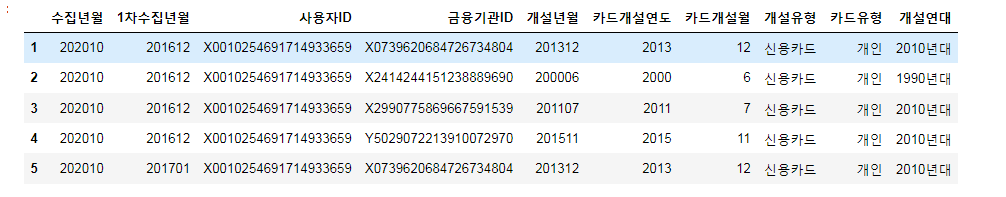

In [61]:
low2

,수집년월,1차수집년월,사용자ID,금융기관ID,개설년월,카드개설연도,카드개설월,개설유형,카드유형,개설연대
1,202010,201612,X0010254691714933659,X0739620684726734804,201312,2013,12,신용카드,개인카드,2010년대
2,202010,201612,X0010254691714933659,X2414244151238889690,200006,2000,6,신용카드,개인카드,1990년대
3,202010,201612,X0010254691714933659,X2990775869667591539,201107,2011,7,신용카드,개인카드,2010년대
4,202010,201612,X0010254691714933659,Y5029072213910072970,201511,2015,11,신용카드,개인카드,2010년대
5,202010,201701,X0010254691714933659,X0739620684726734804,201312,2013,12,신용카드,개인카드,2010년대
...,...,...,...,...,...,...,...,...,...,...
97316,202010,201811,Y9222402642167019485,Y7420900344501987908,200701,2007,1,신용카드,개인카드,2000년대
97317,202010,201812,Y9222402642167019485,X1297134994299296873,201306,2013,6,신용카드,개인카드,2010년대
97318,202010,201812,Y9222402642167019485,X6306325470693895595,201012,2010,12,신용카드,개인카드,2000년대
97319,202010,201812,Y9222402642167019485,Y5753670888276004077,201101,2011,1,신용카드,개인카드,2010년대


In [ ]:
# 15. 카드 개설 df와 차주정보 df를 memberID를 기준으로 병합하여 새로운 df로 저장하시오.
# inner_join 




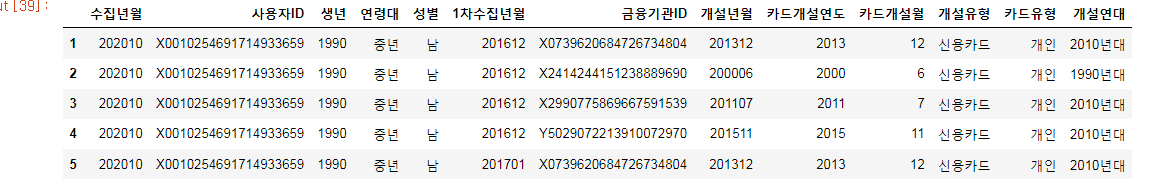

In [63]:
fin_data=raw_data.merge(raw_data_open)
fin_data.index=[i for i in range(1,len(fin_data)+1)]

fin_data.head()

,수집년월,사용자ID,생년,나이,연령대,성별,1차수집년월,금융기관ID,개설년월,카드개설연도,카드개설월,개설유형,카드유형,개설연대
1,202010,X0010254691714933659,1990,31,중년,남,201612,X0739620684726734804,201312,2013,12,신용카드,개인카드,2010년대
2,202010,X0010254691714933659,1990,31,중년,남,201612,X2414244151238889690,200006,2000,6,신용카드,개인카드,1990년대
3,202010,X0010254691714933659,1990,31,중년,남,201612,X2990775869667591539,201107,2011,7,신용카드,개인카드,2010년대
4,202010,X0010254691714933659,1990,31,중년,남,201612,Y5029072213910072970,201511,2015,11,신용카드,개인카드,2010년대
5,202010,X0010254691714933659,1990,31,중년,남,201701,X0739620684726734804,201312,2013,12,신용카드,개인카드,2010년대


In [ ]:
# 16. 카드 개설 인원을 청년, 중년, 장년, 노년으로 비교할 수 있도록 그래프로 표현하시오



In [ ]:
# fin_data.sort_values(by="연령대")
# fin_data.plot(kind="barh")
# plt.yticks("청년", "중년", "장년", "노년")
# plt.xticks(x,(x[i] for i in range(7)))
# plt.xlabel('인원수') # 'x축제목'
# plt.ylabel('연령대') # 'y축제목'
# plt.show()

# 어찌 수정을 해야할까..


중년    1128
장년     911
노년     636
청년     217
Name: 연령대, dtype: int64

<AxesSubplot:>

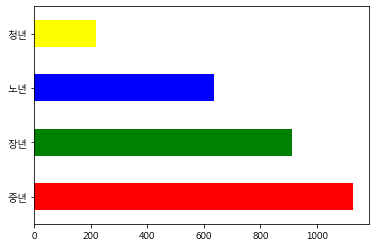

In [65]:
y_cate = pd.value_counts(fin_data['연령대'])
y_cate

y_cate.plot(kind='barh', color=['red','green','blue','yellow'] )


199605    25
199611     2
199701    25
199706    14
199806    25
          ..
201804    18
201807     6
201808     5
201810     3
201811     2
Name: 개설년월, Length: 96, dtype: int64

<Figure size 720x432 with 0 Axes>

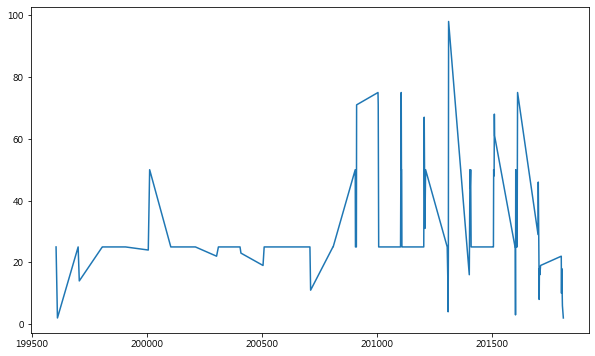

(array([10., 10., 52.,  1.,  4., 10.,  3.,  5.,  0.,  1.]),
 array([ 2. , 11.6, 21.2, 30.8, 40.4, 50. , 59.6, 69.2, 78.8, 88.4, 98. ]),
 <BarContainer object of 10 artists>)

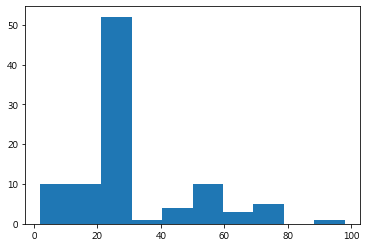

In [72]:
# 17 시간의 흐름에 따른 카드 개설 인원의 추이를 확인할 수 있는 그래프를 표현하시오.



open_count = pd.value_counts(fin_data['개설년월']).sort_index()
open_count
plt.figure(figsize=(10,6))
plt.plot(open_count)
plt.show()
plt.hist(open_count)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


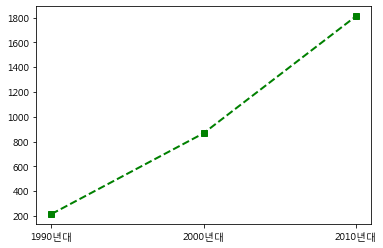

In [73]:
# 18 fin_data df를 이용하여 각 연대별 발급건수를 표현하는 피봇테이블을 생성하고 해당 테이블을 
# 사용하여 각 연대별 신용카드 발급 추이를 나타내는 그래프를 그리시오

p_year = pd.pivot_table(fin_data, index=['개설연대'],values=['생년'],aggfunc=len)
# p_year
plt.plot(p_year, lw=2, marker='s', c='g',ls='--')
plt.show()


In [74]:
# 19 신용카드의 각 연도별 발급건수를 계산하고 연도별 오름차순으로 정렬하시오.
# 결과를 변수에 저장하시오
y_count=fin_data['카드개설연도'].value_counts().sort_index()
y_count

1996     27
1997     39
1998     50
1999     25
2000     74
2001     50
2002     50
2003     47
2004     48
2005     44
2006     75
2007    136
2008     50
2009    196
2010    171
2011    250
2012    223
2013    162
2014    235
2015    377
2016    324
2017    173
2018     66
Name: 카드개설연도, dtype: int64

<Figure size 720x432 with 0 Axes>

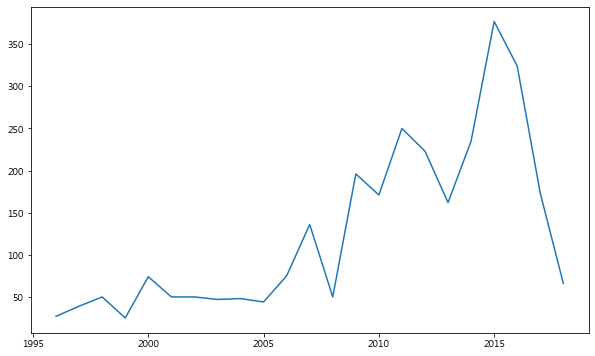

In [75]:
# 20 19번에서 저장한 변수의 데이터를 활용하여 연도별 
# 개설건수에 대하여 시계열 그래프로 표현하시오.
plt.figure(figsize=(10,6))
plt.plot(y_count)

In [69]:
# 21. 성별,연령대로 그룹화하여 카드 발급 건수를 표현하는 피봇테이블을 작성하고 변수에 저장하시오

c_count =  pd.pivot_table(fin_data, index=['성별','연령대'],values=['생년'],aggfunc=len)

In [70]:
c_count

생년
성별 연령대     
남  청년    75
   중년   679
   장년   200
   노년   182
여  청년   142
   중년   449
   장년   711
   노년   454

![](문제21_피봇.png)

In [ ]:
# 21. 21번에서 저장한 변수를 이용하여 아래와 같은 그래프를 작성하시오.
# s=c_count.unstack(1)  #unstack 함수--행인덱스를 열인데스로.열행덱스를 행인덱스로
# s


생년               
연령대   청년   중년   장년   노년
성별                     
남     75  679  200  182
여    142  449  711  454

<AxesSubplot:xlabel='성별'>

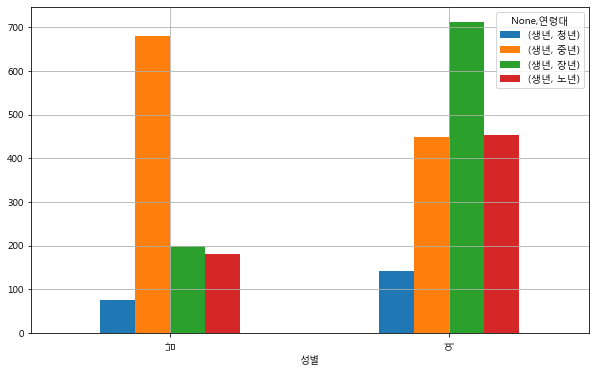

In [71]:
s=c_count.unstack(1)
s

s.plot(kind='bar', grid=True, figsize=(10,6))

